# Topic Modeling with Latent Dirichlet Allocation Model
In this project extension I will explore applying an LDA model to the data. This model aims to uncover hidden structure in a collection of texts. This type of modeling can be compared to clustering (thus an interesting extension for this project) but with LDA it builds clusters of words rather than clusters of texts.  


> LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

# Libraries and Data

In [13]:
#custom functions 
from projectfunctions import * 

In [14]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd 
import pickle  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

import gensim.corpora as corpora 

from pprint import pprint 


import os

In [15]:
#import text data
df = pickle.load( open( "Pickles/standards_corpi.pkl", "rb" ) ) 
df.drop(df.tail(1).index,inplace=True)  
df

<ipython-input-15-f4e6b97e1536>:2: ResourceWarning: unclosed file <_io.BufferedReader name='Pickles/standards_corpi.pkl'>
  df = pickle.load( open( "Pickles/standards_corpi.pkl", "rb" ) )


,level_0,state,corpus
0,0,TXTfiles/alabama,"'information', 'regarding', 'course', 'study',..."
1,1,TXTfiles/alaska,"'dept', 'education', 'early', 'development', '..."
2,2,TXTfiles/arizona,"'department', 'education', 'academic', 'introd..."
3,3,TXTfiles/colorado,"'review', 'revision', 'committee', 'chairperso..."
4,4,TXTfiles/flordia,"'specifications', 'florida', 'state', 'adoptio..."
5,5,TXTfiles/georgia,"'excellence', 'first', 'excellence', 'designed..."
6,6,TXTfiles/idaho,"'content', 'state', 'superintendent', 'public'..."
7,7,TXTfiles/indiana,"'physics', 'engineering', 'process', 'seps', '..."
8,8,TXTfiles/louisiana,"'shifts', 'following', 'key', 'shifts', 'calle..."
9,9,TXTfiles/mass,"'massachusetts', 'technology', 'framework', 'e..."


# Prepare Data For LDA Analysis 

In [16]:
#set features & labels to list
corpi_list = df['corpus'].values.tolist() 
state_list = df['state'].values.tolist()

In [17]:
#clean / from strings in list 
cleaned_list = []

for word in corpi_list:  
    cleaned_string = " "
    for character in word: 
        if character.isalnum(): 
            cleaned_string += character 
        else: 
            cleaned_string += " " 
    cleaned_string = cleaned_string.split()
    cleaned_list.append(cleaned_string)

In [18]:
print(cleaned_list[:1][0][:30])

['information', 'regarding', 'course', 'study', 'materials', 'contact', 'math', 'technology', 'initiative', 'amsti', 'section', 'state', 'department', 'education', 'gordon', 'persons', 'building', 'ripley', 'street', 'montgomery', 'mail', 'box', 'montgomery', 'telephone', 'thomas', 'bice', 'state', 'superintendent', 'education', 'state']


In [19]:
#create a dictionary of words 
id2word = corpora.Dictionary(cleaned_list)  
id2word

In [20]:
#create a dictionary of words 
id2word = corpora.Dictionary(cleaned_list) 

#create corpus 
texts = cleaned_list

#TDF 
corpus = [id2word.doc2bow(text) for text in texts]

#sanity check 
print(corpus[:1][0][:30])

[(0, 8), (1, 12), (2, 6), (3, 22), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 3), (13, 1), (14, 1), (15, 12), (16, 6), (17, 2), (18, 1), (19, 5), (20, 1), (21, 3), (22, 4), (23, 1), (24, 1), (25, 1), (26, 3), (27, 2), (28, 2), (29, 1)]


# Train a Vanilla LDA Model 

In [21]:
#number of topics
num_topics = 12  

#build model 
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                      id2word=id2word, 
                                      num_topics=num_topics)

#print keywords in each topic 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"energy" + 0.008*"scientific" + 0.008*"earth" + 0.008*"data" + '
  '0.007*"use" + 0.007*"information" + 0.006*"evidence" + 0.006*"describe" + '
  '0.006*"water" + 0.006*"using"'),
 (1,
  '0.011*"energy" + 0.009*"evidence" + 0.007*"scientific" + 0.007*"earth" + '
  '0.007*"using" + 0.006*"data" + 0.006*"use" + 0.005*"information" + '
  '0.005*"examples" + 0.005*"different"'),
 (2,
  '0.009*"energy" + 0.007*"earth" + 0.007*"information" + 0.006*"using" + '
  '0.006*"evidence" + 0.006*"include" + 0.006*"data" + 0.006*"changes" + '
  '0.005*"scientific" + 0.005*"describe"'),
 (3,
  '0.011*"energy" + 0.009*"use" + 0.007*"evidence" + 0.007*"earth" + '
  '0.007*"scientific" + 0.006*"using" + 0.005*"systems" + 0.005*"engineering" '
  '+ 0.005*"include" + 0.005*"data"'),
 (4,
  '0.013*"energy" + 0.007*"evidence" + 0.007*"include" + 0.007*"earth" + '
  '0.007*"use" + 0.007*"data" + 0.007*"describe" + 0.006*"information" + '
  '0.006*"scientific" + 0.005*"engineering"'),
 (5,
  '0.0

# Model Analysis 

## Dominant Topic & Percentage Contribution 

In [27]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7571,"energy, use, evidence, earth, scientific, usin...","[information, regarding, course, study, materi..."
1,1,2.0,0.2439,"energy, earth, information, using, evidence, i...","[dept, education, early, development, board, e..."
2,2,5.0,0.4981,"energy, use, earth, data, evidence, system, sy...","[department, education, academic, introduction..."
3,3,5.0,0.2458,"energy, use, earth, data, evidence, system, sy...","[review, revision, committee, chairpersons, jo..."
4,4,0.0,0.5128,"energy, scientific, earth, data, use, informat...","[specifications, florida, state, adoption, ins..."


## The Most Representative Sentence for Each Topic

In [29]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7218,"energy, scientific, earth, data, use, information, evidence, describe, water, using","[elementary, essential, knowledge, skills, subchapter, elementary, statutory, authority, provisi..."
1,2.0,0.2439,"energy, earth, information, using, evidence, include, data, changes, scientific, describe","[dept, education, early, development, board, education, early, development, james, fields, chair..."
2,3.0,0.7571,"energy, use, evidence, earth, scientific, using, systems, engineering, include, data","[information, regarding, course, study, materials, contact, math, technology, initiative, amsti,..."
3,5.0,0.5226,"energy, use, earth, data, evidence, system, systems, using, include, models","[miss, admin, code, part, college, career, readiness, carey, wright, ed, state, superintendent, ..."
4,7.0,0.7274,"energy, earth, engineering, evidence, data, information, use, include, describe, concepts","[shifts, following, key, shifts, called, student, apply, content, knowledge, content, knowledge,..."
5,8.0,0.5587,"energy, earth, evidence, scientific, use, information, describe, engineering, using, models","[learning, public, schools, board, education, commonwealth, learning, public, schools, adopted, ..."
6,9.0,0.5069,"energy, evidence, earth, use, engineering, information, systems, data, scientific, examples","[core, engineering, education, seed, state, board, education, east, box, salt, lake, city, sydne..."


## Word Clouds for Top N Keywords in Each Topic

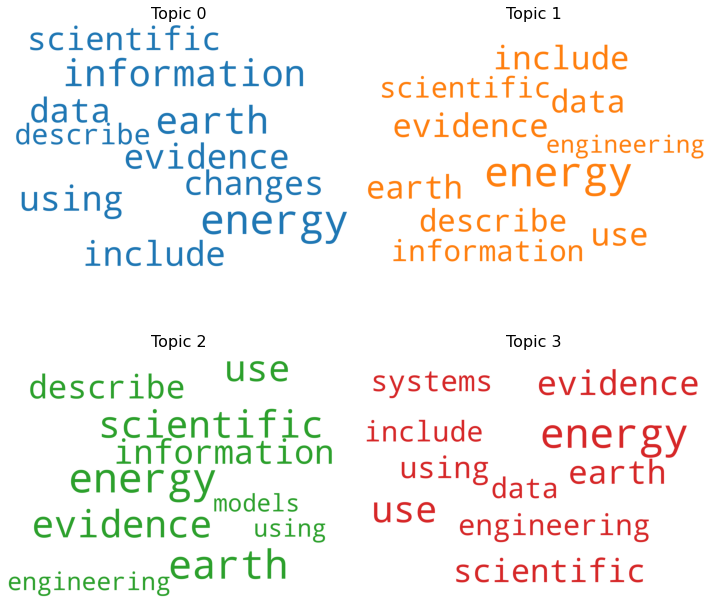

In [33]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [38]:
lda_model.id2word

## PyLDA Visualization 

In [37]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.003865 -0.001487       1        1  21.126111
3      0.000368  0.002251       2        1  16.081775
8      0.002716  0.001497       3        1  15.287542
5     -0.000494  0.004585       4        1  10.479304
0      0.005432 -0.001562       5        1   7.524875
2      0.001254 -0.001529       6        1   6.776441
9     -0.001941 -0.001567       7        1   6.197957
11     0.002420  0.001655       8        1   4.979617
1      0.000376 -0.001769       9        1   4.976891
4     -0.000834 -0.002972      10        1   2.836036
6     -0.000286 -0.000454      11        1   2.735812
10    -0.005146  0.001353      12        1   0.997640, topic_info=             Term         Freq        Total Category  logprob  loglift
1154       energy  7967.000000  7967.000000  Default  30.0000  30.0000
1225     evidence  5499.000000  5499.000000  Default  29.0000  29.0000
1164  engineering  4527.000000  4527.000000  Default  28.0000  28.0000
1059        earth  5908.000000  5908.000000  Default  27.0000  27.0000
1687      include  3876.000000  3876.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2032       matter    27.921707  2946.951316  Topic12  -5.5982  -0.0516
837          data    35.738801  4642.246578  Topic12  -5.3514  -0.2592
1724  information    33.350362  4268.645841  Topic12  -5.4206  -0.2444
1648     identify    27.928518  2975.119664  Topic12  -5.5980  -0.0609
2926   scientific    31.899067  4655.021296  Topic12  -5.4650  -0.3756

[1079 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.198265  ability
1         2  0.136734  ability
1         3  0.174336  ability
1         4  0.088877  ability
1         5  0.092296  ability
...     ...       ...      ...
7885      8  0.057077      zoo
7885      9  0.035673      zoo
7885     10  0.014269      zoo
7885     11  0.028539      zoo
7885     12  0.007135      zoo

[5433 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 9, 6, 1, 3, 10, 12, 2, 5, 7, 11])

These visualizations are making me realize that I'm still not boiling down to the meat of what I want to cluster. Intuitively you would think the clusters are about biology, physics ext and it is not. I think next steps are to build an LDA model on just a single standards document to better understand the grouping patterns. 

# Resources: 
* [Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0) 
* [Topic Modeling Visualization - How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)